In [2]:
# 在计算机的内存中一次性存储多个数值, 选择张量数据结构 => 维度, 形状和数据类型
x = torch.tensor([1, 3, 6, 8], dtype=torch.int64)
x

tensor([1, 3, 6, 8])

In [3]:
# 在计算机的内存中一次性存储多个数值
y = torch.tensor([2, 5, 4, 3], dtype=torch.int64)
y

tensor([2, 5, 4, 3])

假设特征变量和标签之间的因果关系是线性关系: $y=wx$

假设选择的最合适损失函数是SSE: SSE = f(w; X, y) = $\sum_{i=1}^{m}(\hat{y}-y)^2$  
SSE是一个数值: sum of the squared errors

绘制函数: $10w^2-34w+29$的图像

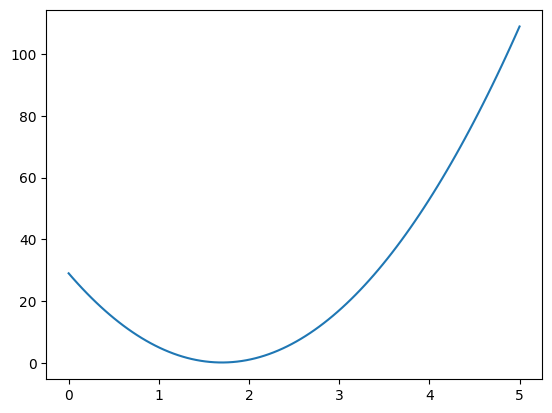

In [4]:
# 函数的定义域: (-∞, +∞) => 选择定义域的一个子区间[0, 5], evenly spaced取若干个点
w = np.linspace(start=0, stop=5, num=100)
loss = 10 * w ** 2 - 34 * w + 29

plt.plot(w, loss)
plt.show()

损失函数表达式1: $10w^2-34w+29$

In [5]:
def calc_loss_sse1(w):
    """计算损失函数表达式1对应模型参数w的取值时的损失函数值
    @param w: 模型的参数w
    """
    return 10 * w ** 2 - 34 * w + 29

损失函数表达式1的导函数表达式: $20w-34$

In [7]:
def calc_d_loss_sse1(w):
    """计算损失函数表达式1对应模型参数w的取值时的导函数值
    @param w: 模型的参数w
    """
    return 20 * w - 34

损失函数表达式2: $100w^2-96w+25$

In [8]:
def calc_loss_sse2(w):
    """
    计算损失函数表达式2对应模型参数w的取值时的损失函数值
    @param w: 模型的参数w
    """
    return 100 * w ** 2 - 96 * w + 25

损失函数表达式2的导函数表达式: $200w-96$

In [9]:
def calc_d_loss_sse2(w):
    """计算损失函数表达式2对应模型参数w的取值时的导函数值
    @param w: 模型的参数w
    """
    return 200 * w - 96

完整的损失函数表达式: $110w^2-100w+54$

In [10]:
def calc_loss_sse(w):
    """
    计算完整的损失函数表达式对应模型参数w的取值时的损失函数值
    @param w: 模型的参数w
    """
    return 110 * w ** 2 - 100 * w + 54

完整的损失函数表达式的导函数表达式: $220w-100$

In [12]:
def calc_d_loss_sse(w):
    """
    计算完整的损失函数表达式对应模型参数w的取值时的损失函数值
    @param w: 模型的参数w
    """
    return 220 * w - 100

In [13]:
# 模型(假设中用于描述特征变量和标签之间关系的函数表达式)中的参数的初始化
w = 0
lr = 0.01
n_epochs = 20

# 在计算机的内存中逐个(根据循环)存储数值 => 选择列表数据结构
w_lst = [0]
loss_sse1 = []
loss_sse2 = []
loss_sse = []

# 搭建深度神经网络模型的训练流程
for i_epoch in range(n_epochs):
    # 计算以当前模型的参数, 模型性能评估指标的取值
    loss_sse.append(calc_loss_sse(w))
    # 计算以当前模型的参数, 在完整的数据集的第一个子集中训练前的损失函数取值
    loss_sse1.append(calc_loss_sse1(w))
    # 模型进行训练, 更新模型的参数. 预期能够减小第一个子集对应的损失函数值
    w -= lr * calc_d_loss_sse1(w)
    # 记录模型的参数取值的变化
    w_lst.append(w)
    # 计算以更新后的模型的参数, 在一个完整的数据集的第一个子集中训练后的损失函数取值
    loss_sse1.append(calc_loss_sse1(w))
    
    # 计算以当前模型的参数, 在完整的数据集的第二个子集中训练前的损失函数取值
    loss_sse2.append(calc_loss_sse2(w))
    # 模型进行训练, 更新模型的参数. 预期能够减小第二个子集对应的损失函数值
    w -= lr * calc_d_loss_sse2(w)
    # 记录模型的参数取值的变化
    w_lst.append(w)
    # 计算以更新后的模型的参数, 在一个完整的数据集的第二个子集中训练后的损失函数取值
    loss_sse2.append(calc_loss_sse2(w))
    
# 计算以完成整个训练流程, 计算以当前模型的参数, 模型性能评估指标的取值
loss_sse.append(calc_loss_sse(w))

<Axes: >

<Axes: >

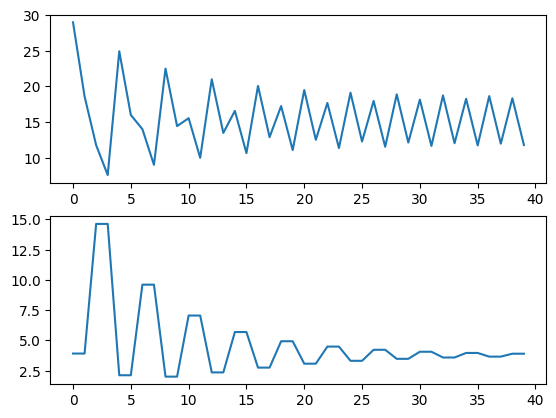

In [18]:
# 查看在对完整的数据集进行多遍学习中, 每一遍在第一个子集中的损失函数变化情况
plt.subplot(211)
plt.plot(list(range(n_epochs*2)), loss_sse1)
# 查看在对完整的数据集进行多遍学习中, 每一遍在第二个子集中的损失函数变化情况
plt.subplot(212)
plt.plot(list(range(n_epochs*2)), loss_sse2)

<Axes: >

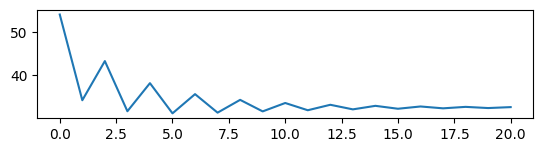

In [19]:
# 查看在对完整的数据集进行多遍学习中, 每一遍模型性能评估指标的取值变化情况
plt.subplot(313)
plt.plot(list(range(n_epochs+1)), loss_sse)